> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Topic: I choose dataset from "No-show appointment" for my investigate analysis. The dataset included 14 columns which are information about patients such as ID, Appointment ID, Appointment schedule, Hospital in area, Scholarship,....

> Question to figure out:

> 1. Will the patient information such as age, gender and diseases impact on decision of No-show?

> 2. Differences between scheduled day and appointment days impact on No-show?



In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [4]:
# Loading data file
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

In [6]:
df[df.duplicated()==True]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> There are no duplicated information in dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> 1. There are totally 110527 observations, and 14 attributes. 
> 2. The Scheduled & Appointment days should be in type DateTime 
> 3. Should have a column to see the awaiting days between scheduled day and appointment day

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> 1. No lacking information in each column, due to total observations are same with 110527
> 2. In Age column, there is Min with -1. It could be assumed that is a new born baby - under 1 years old. There is also max with more than 100 years old, it is also interesting to look detail inside, to see any relevant from highest age with No-Show

In [9]:
# Change title of columns PatientId, Hipertension, Handcap
df.rename(columns={'PatientId':'PatientID', 'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_Show'}, inplace = True)
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Change data type of ScheduledDay and AppointmentDay from Object to Datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df[['ScheduledDay','AppointmentDay']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


> I will not change with format '%Y-%m-%dT%H:%M:%SZ' because the column Appointment Day does not have time.
> Therefore, with hours are no meaning in analyzing. So I just change basically the type to datetime. 

> Change category columns of Gender and No_Show with
> "0" for F (Gender) & Yes (No_Show)
> "1" for M (Gender) & No (No_Show)

In [11]:
df['Gender'].replace(['F','M'],[0,1],inplace=True)

In [12]:
df['No_Show'].replace(['Yes','No'],[0,1], inplace=True)

In [13]:
df

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.596266e+12,5650093,0,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.557663e+13,5630692,0,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.213493e+13,5630323,0,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1


<a id='eda'></a>
## Exploratory Data Analysis



In [106]:
def plot_hist(df,column_name):
    df[column_name].plot(kind='hist', figsize=(8,5))
    plt.title('Histogram of {}'.format(column_name))
    plt.ylabel('No. of Patients')
    plt.xlabel(column_name)
    plt.show()

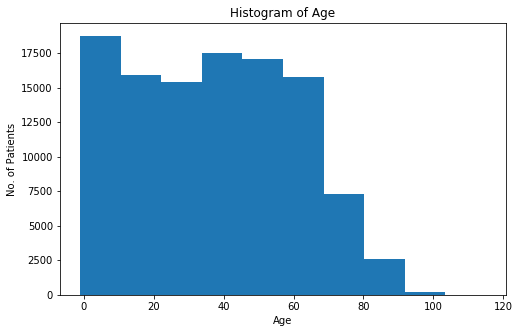

In [107]:
plot_hist(df,'Age')

> The chart shows that most of the patients are up to 55 years old, after 60 years old are down significantly.

> The patients in group age from 0 to 10 years old account the highest distribution to number of patients

In [202]:
def plot_dishist(df,column_name1,column_name2,legends):
    Not_Showed = df[column_name1] == 0
    Showed = df[column_name1] == 1
    plt.figure(figsize=(10,10))
    df[column_name2][Showed].hist(alpha=0.8, bins=15);
    df[column_name2][Not_Showed].hist(alpha=0.8, bins=15);
    plt.grid(True)
    plt.legend(legends)
    plt.xlabel(column_name2)
    plt.ylabel('No.of Patients')
    plt.title('Distribution of Showing Up Appointment by {}'.format(column_name2))

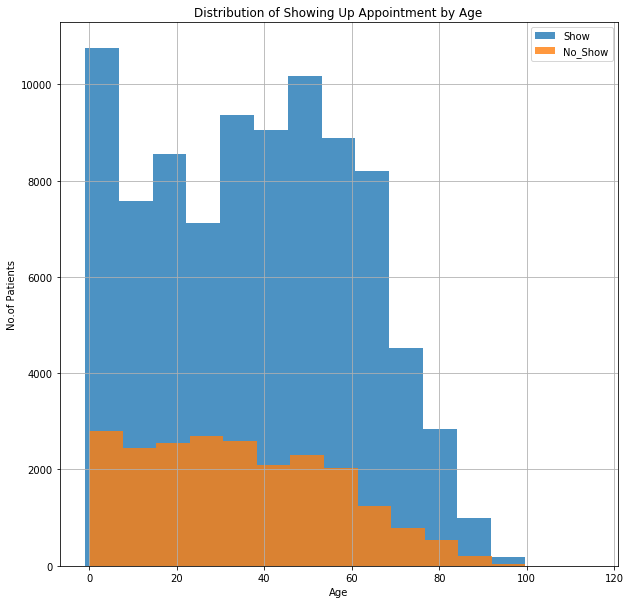

In [203]:
plot_dishist(df,'No_Show','Age',legends=['Show','No_Show'])

> The orange colour is the rate of the patients do not want to show up their appointment.

> As chart shows that most of the young people under 40 years old do not want to show their appointment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A781739BC8>,
      dtype=object)

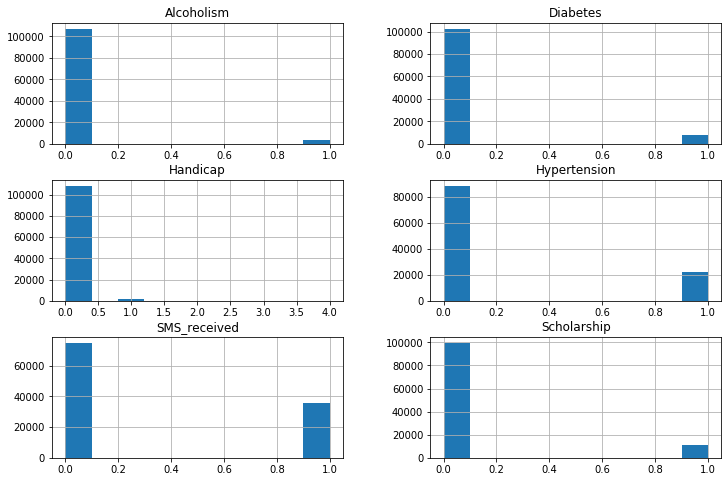

In [16]:
df[['Scholarship','Alcoholism','Diabetes','Hypertension','Handicap','SMS_received']].hist(figsize=(12,8))

> 1.Alcoholism: Most of the patients are not Alcoholism

> 2.Diabetes: Most of the patients do not have Diabetes

> 3.Handicap: Most of the patients do not have Handicap

> 4.Hypertension: Almost 20% of the patients have issues with Hypertension

> 5.Scholarship: Most of the patients do not join scholarship

> 6.SMS_received: Almost 30% of the patients recieved the SMS for appointment

No_Show = 0
Show = 1


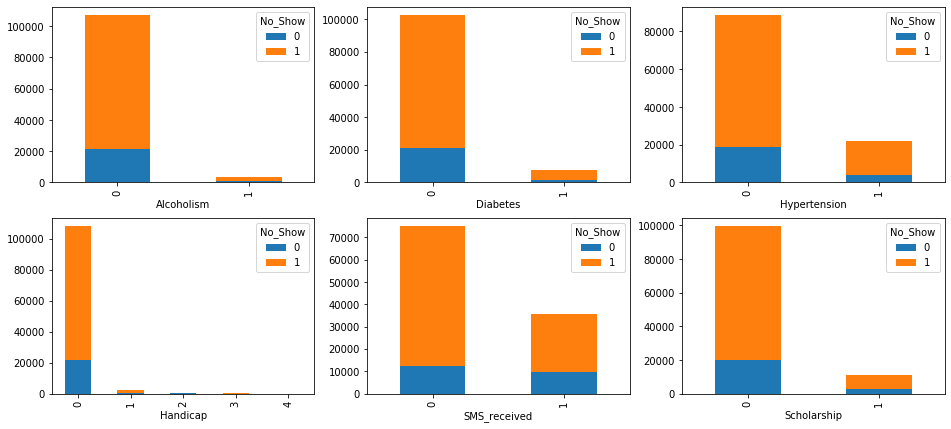

In [17]:
Category_Att = ['Alcoholism', 'Diabetes', 'Hypertension', 'Handicap', 'SMS_received','Scholarship']

print('No_Show = 0')
print('Show = 1')
fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(Category_Att):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_Show'])[var].count().unstack('No_Show').plot(ax=ax, kind='bar', stacked=True)

> For Category columns such as Alcoholism, Diabetes, Hypertension, Handicap, SMS received, Scholarship
> - Most of the patients show up their appointments
> - Just only around 20% of the patients do not show up their appointments

In [183]:
def plot_pie(df,column_name,labels):
    gender_chart = df[column_name].value_counts().plot.pie(figsize=(9,9),colors= ['tomato','steelblue'], labels=labels,explode = (0,0.1),autopct='%.1f%%',startangle=100,fontsize=15)
    gender_chart.set_title('Distribution of {}'.format(column_name))

Distribution of patients by Gender: 

Female: 71837 
Male: 38685


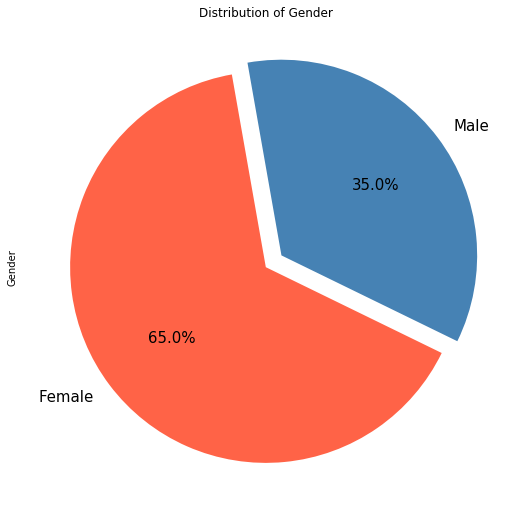

In [184]:
print ("Distribution of patients by Gender: \n")
print ("Female: {} \nMale: {}".format(df['Gender'].value_counts()[0], df['Gender'].value_counts()[1]) )
plot_pie(df,'Gender',labels=['Female','Male'])

> There are more females than males. We need to see how is the distribution of No_Show by Gender

In [180]:
def plot_dis(df,column_name1,column_name2,labels):
    B1 = df[(df[column_name1] == 0)][column_name2].value_counts()
    B2 = df[(df[column_name1] == 1)][column_name2].value_counts()
    No_Show = B1
    Show = B2
    width = 0.75
    fig, ax = plt.subplots()
    ax.bar(labels,No_Show,width,label='No_Show')
    ax.bar(labels,Show,width,bottom=No_Show,label='Show')
    ax.set_xlabel(column_name2)
    ax.set_ylabel('No. of Patients')
    ax.set_title('Distribution of Showing Up by {}'.format(column_name2))
    ax.legend()
    plt.show()

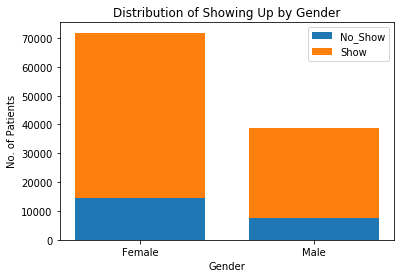

In [181]:
plot_dis(df,'No_Show','Gender',labels=['Female','Male'])

> By Gender, for both Female and Male, the patients do not want to show up their appointment are just around 20%

In [20]:
# Create column Awaiting Appointment to see the different day between schedule day and appointment day
df['Awaiting_Appointment'] = (df.AppointmentDay - df.ScheduledDay).dt.days
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Awaiting_Appointment
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [21]:
print('Unique values of Awaiting Appointment is {}'.format(df['Awaiting_Appointment'].unique()))

Unique values of Awaiting Appointment is [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  -1  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127
 111 119  74  71  82 108 110 102 122 101 105  92  97  93 107  95  -6 139
 132 179 117 146 123]


> There are some awaiting appointment is lower than 0, it is impossible to have appointment before scheduled days.
> Therefore the values under 0, will be deleted

In [22]:
# Counting how many observations has awaiting time under 0
print('Original: {}'.format(df[(df.Awaiting_Appointment < 0)].Awaiting_Appointment.value_counts()))

Original: -1    4
-6    1
Name: Awaiting_Appointment, dtype: int64


In [23]:
# delete the rows with awaiting time under 0
df = df[(df.Awaiting_Appointment >= 0)]

In [24]:
# Confirm with no observations of awaiting time under 0
print('Revised: {}'.format(df[(df.Awaiting_Appointment < 0)].Awaiting_Appointment.value_counts()))

Revised: Series([], Name: Awaiting_Appointment, dtype: int64)


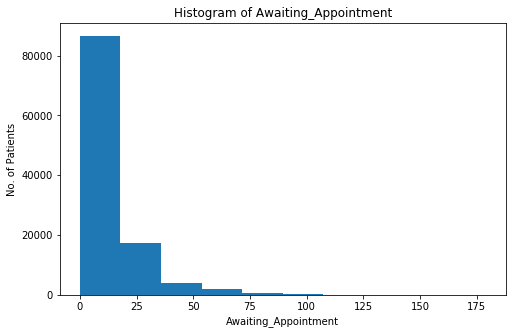

In [108]:
plot_hist(df,'Awaiting_Appointment')

>The chart shows that many patients has 0 days of awaiting they, I want to look deeper how many patients has appointment day same to scheduled day

In [26]:
same_appointment_day = df[(df.Awaiting_Appointment == 0)].Awaiting_Appointment.value_counts()
same_appointment_day
# We can see more than 38000 Patients have same day between Scheduled day and Appointment day. 
# It can be assumed the overload of works in hospital when a lot of patients doing same appointment day. 

0    38563
Name: Awaiting_Appointment, dtype: int64

In [27]:
same_appointment_day_noshow = len(df.query('Awaiting_Appointment == 0 and No_Show == 0'))
same_appointment_day_noshow_raito = int(round(same_appointment_day_noshow/same_appointment_day[0]*100))
print('In {} patients have the same day with scheduled day, {} patients do not show up, it accounts {}%'.format(same_appointment_day[0],same_appointment_day_noshow,same_appointment_day_noshow_raito))

In 38563 patients have the same day with scheduled day, 1792 patients do not show up, it accounts 5%


In [197]:
def plot_series(df,column_name):
    df[column_name].value_counts().plot(figsize=(9,7))
    plt.title('{} Series'.format(column_name))

The Scheduled Day starts on 2015-11-10 00:00:00, ends on 2016-06-08 00:00:00


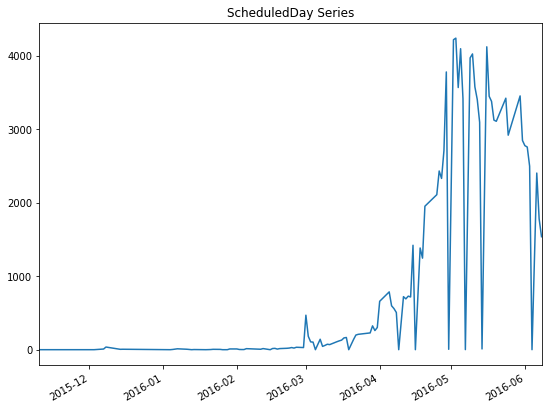

In [200]:
print('The Scheduled Day starts on {}, ends on {}'.format(df['ScheduledDay'].min(),df['ScheduledDay'].max()))
plot_series(df,'ScheduledDay')

The Appointment Day starts on 2016-04-29 00:00:00, ends on 2016-06-08 00:00:00


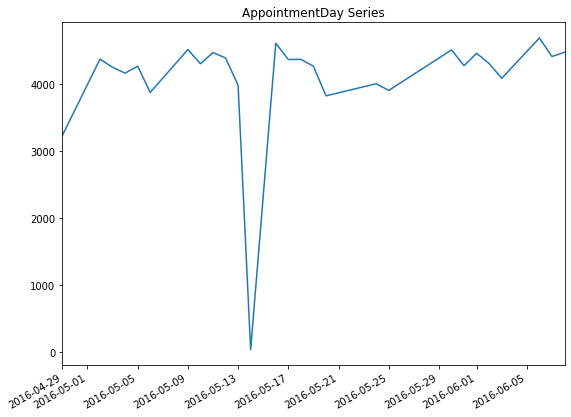

In [201]:
print('The Appointment Day starts on {}, ends on {}'.format(df['AppointmentDay'].min(),df['AppointmentDay'].max()))
plot_series(df,'AppointmentDay')

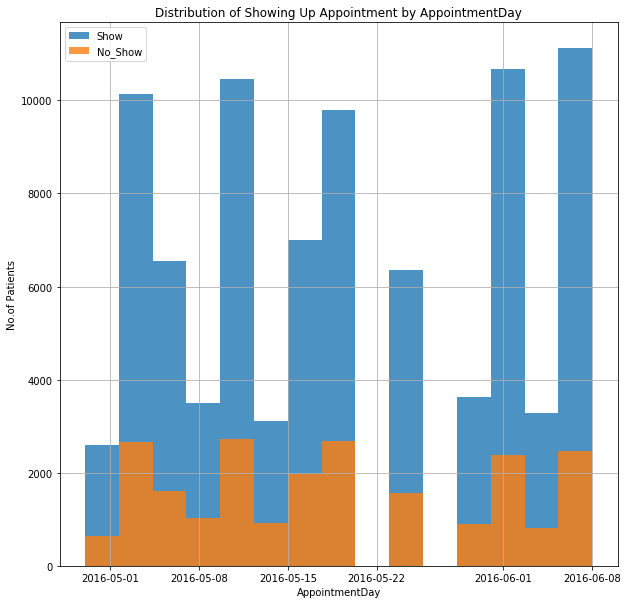

In [204]:
plot_dishist(df,'No_Show','AppointmentDay',legends=['Show','No_Show'])

> For scheduling the visit: It starts from March, but most of the patients scheduled the visits in May and June

> For appointmet acceptance: Its run almost in 2 months May and June

> Checking with No_Show: Orange colour presents for no show up, around 20% of the patients in appointment day do not want to show up their visits. 

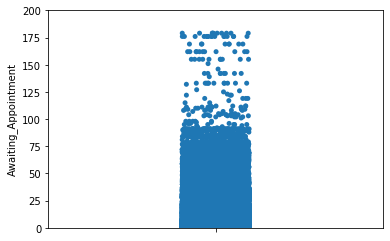

In [169]:
sns.stripplot(y = 'Awaiting_Appointment', data = df, jitter = True)
plt.ylim(0, 200)
plt.show();

> Most of appointments will be set up appointment within 75 days (around 3.5 months)

In [33]:
# Create column Appointment Weekday to see which day of week for each observations in Scheduled Day
df['Appointment_Weekday'] = df.ScheduledDay.dt.weekday_name
df['Appointment_Weekday'].value_counts()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Tuesday      26167
Wednesday    24259
Monday       23085
Friday       18915
Thursday     18072
Saturday        24
Name: Appointment_Weekday, dtype: int64

In [34]:
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Awaiting_Appointment,Appointment_Weekday
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Friday
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Friday


Text(0.5, 1.0, 'Distribution of Scheduled Weekday of Patients')

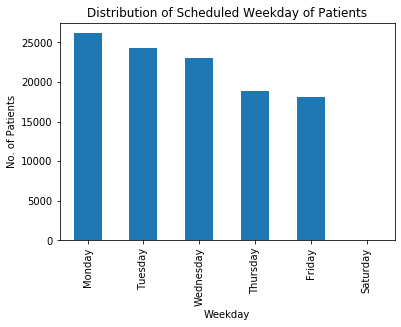

In [35]:
Weekday_chart = df['Appointment_Weekday'].value_counts().plot.bar()
Weekday_chart.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
Weekday_chart.set_xlabel('Weekday')
Weekday_chart.set_ylabel('No. of Patients')
Weekday_chart.set_title('Distribution of Scheduled Weekday of Patients')

> The patients most making appointment on Monday to Wednesday, less visit on Thursday and Friday. Almost weekend no appointment as Saturday has 24 visits and Sunday nothing

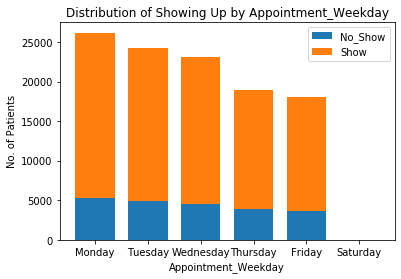

In [182]:
plot_dis(df,'No_Show','Appointment_Weekday',labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

> Weekday or Schedule will not impact to the decision of Show or Unshow as all days have same rates of No_Show and Show

Distribution of Patients by No_Show: 

Yes: 22314 
No: 88208


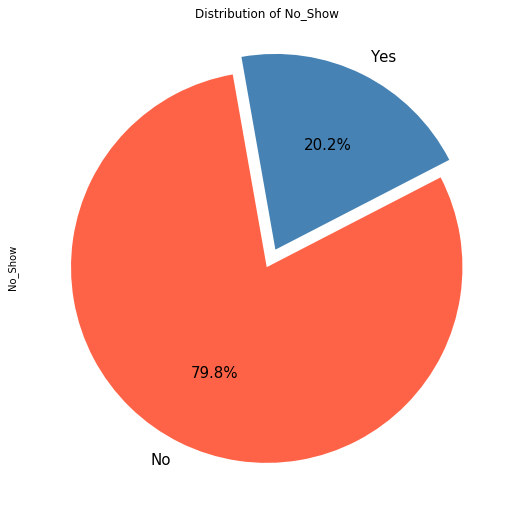

In [185]:
print ("Distribution of Patients by No_Show: \n")
print ("Yes: {} \nNo: {}".format(df['No_Show'].value_counts()[0], df['No_Show'].value_counts()[1]))
plot_pie(df,'No_Show',labels=['No','Yes'])

> 20% of patients do not want to show up their appointment and 80% are ok with this.

### Limitation in dataset
- Dataset should have more information such as platform of interaction between patients and hospitals, or doing survey/short question to survey the reason why they do not want to show up their appointment and we can analyze these reasons will relevant to age, or gender or diseases.
- Dataset has 6 months duration, it is quite limited in analyzing for the changes over the time and the impact on No_Show
- Dataset has repeated rates of NoShow and Show in all analysis, so it is not really significant insights analysis in predicting the impacts to No_Show. It may need deeper statistic analysis and more data as evaluation for No_Show to explore. 

### Conclusions

> For wraggling data I did
- Checking duplicate of whole dataframe
- Rename column titles such as PatientID, Hypertension, Handicap, No_Show, ....
- Change data type of columns AppointmentDay and ScheduledDay to datetime type
- Add 2 more columns of Awaiting Appointment and Appointment_Weekday
- Replace columns Gender and No_Show from category type to quantity type with "0" presents to Female and Yes, followed by "1" for Male and No

> For exploratory data I figured out:

> After creating statistical table
- No lacking information in each column, due to total observations are same with 110527
- In Age column, there is Min with -1. It could be assumed that is a new born baby - under 1 years old. There is also max with more than 100 years old. 75% of the patients are up to 55 years old. 
- Most of the patients receive the SMS from hospitals

> To compare the Appointment Day and Scheduled Day, as well as calculating the Awaiting_Appointment, I changed the data type of these 2 columns to datetime type and delete the hours in Scheduled Day because Appointment Day does not show the hours.

> For Age exploratory, most of the patients are young, from 0 to 55 years old. Specially the highest distribution is the patients from 0 to 10 years old. The from 60 years old, the distribution downs significantly.

> For correlation to No_Show, most of the patients under 40 years old do not want to show up their appointment

> For diseases, most of the patients are not Alcoholism, do not have Diabetes and Handicap. Around 20% of patients have Hypertension. Most of them do not join the scholarship and 30% of them received the SMS from Hospital. 

> For correlation to No_Show, 20% of the patients do not want to show up their visits, rest agree mostly.

> In 110527 patients, 65% are Female and 35% are Male. Both Female and Male, 20% of them do not want to show up the appointment.

> There are more than 38000 patients have the same appointment day versus to scheduled day. It may be assumed the overload of hospitals to arrange and manage the urgent cases. And in more than 38000 patients have same appointment day and scheduled day, 5% of them (1792 patients) do not want to show up their appointment.

> The Scheduled Day starts on 2015-11-10 00:00:00, ends on 2016-06-08 00:00:00

> The Appointment Day starts on 2016-04-29 00:00:00, ends on 2016-06-08 00:00:00

> For scheduling the visit: It starts from March, but most of the patients scheduled the visits in May and June

> For appointmet acceptance: Its run almost in 2 months May and June

> Checking with No_Show: Orange colour presents for no show up, around 20% of the patients in appointment day do not want to show up their visits.

> Most of appointments will be set up appointment within 75 days (around 3.5 months)

> The patients most making appointment on Monday to Wednesday, less visit on Thursday and Friday. Almost weekend no appointment as Saturday has 24 visits and Sunday nothing. Weekday or Schedule will not impact to the decision of Show or Unshow as all days have same rates of No_Show and Show

> >>> To sum up, for all category columns or information about patients, mostly the distribution of No_Show are same result. The data need to be more details to explore more the impact to No_Show such as platform of interaction between patients and hospitals, or doing survey/short question to survey the reason why they do not want to show up their appointment and we can analyze these reasons will relevant to age, or gender or diseases. 


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [205]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295